<a href="https://colab.research.google.com/github/RojaCM/PROJECTS/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`lr#Project Title : Seoul Bike Sharing Demand Prediction

Problem Description
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

#Data Description
#The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
#Attribute Information:
Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#IMPORTING necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
files=files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [3]:
df=pd.read_csv('SeoulBikeData.csv',encoding='unicode escape')

In [4]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
df.shape

(8760, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df1=df

In [8]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


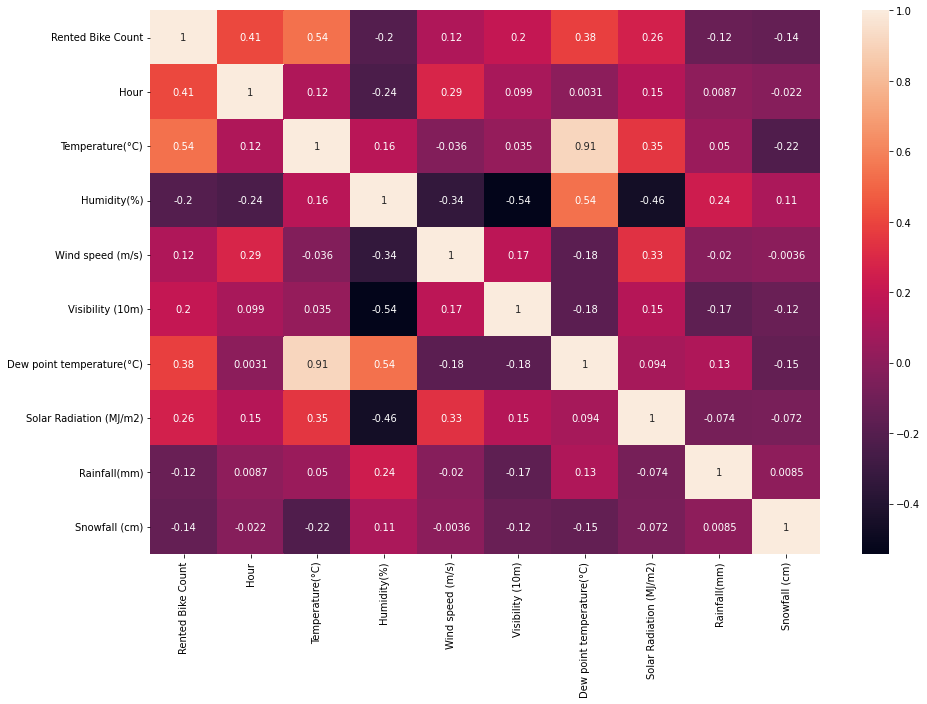

In [9]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

#Data Cleaning
checking null values present or not

In [10]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

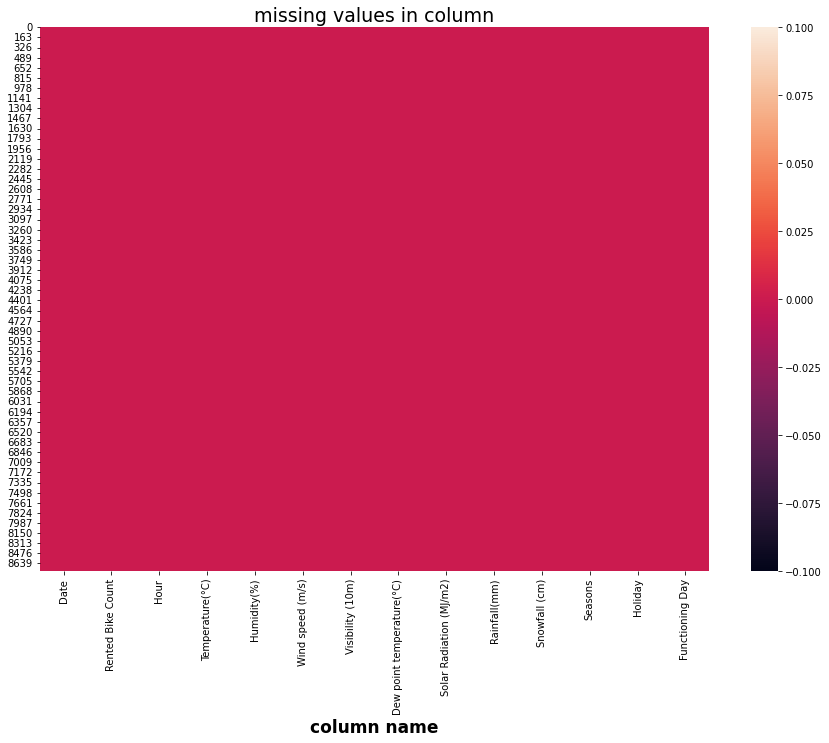

In [11]:
#checking missing values
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cbar=True)
plt.xlabel('column name',size=17,weight='bold')
plt.title('missing values in column',size=19)
plt.show()

In [12]:
#checking on numerical columns
num_cols=df.select_dtypes(include=['number'])

In [13]:
num_cols.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [14]:
#checking object data types
cat_cols=df.select_dtypes(include=['object'])

In [15]:
cat_cols

,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes
...,...,...,...,...
8755,30/11/2018,Autumn,No Holiday,Yes
8756,30/11/2018,Autumn,No Holiday,Yes
8757,30/11/2018,Autumn,No Holiday,Yes
8758,30/11/2018,Autumn,No Holiday,Yes


Exploratory Data Analysis and Preprocessing (EDA)

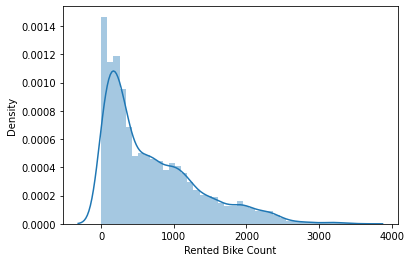

In [16]:
# Visualization Distrubution
sns.distplot(df['Rented Bike Count'])

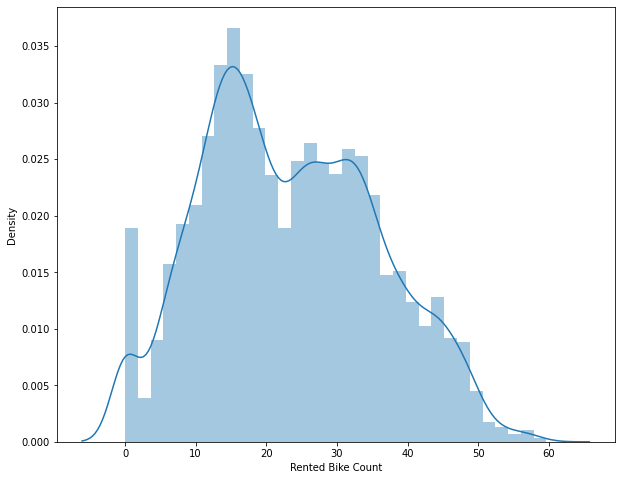

In [17]:
#square oot transformation
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count']))

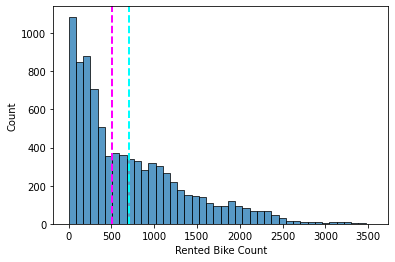

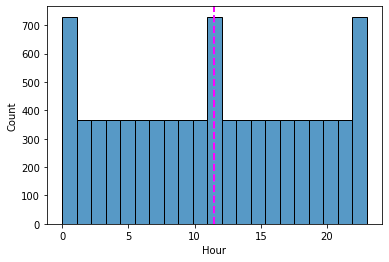

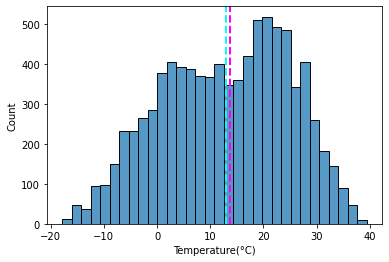

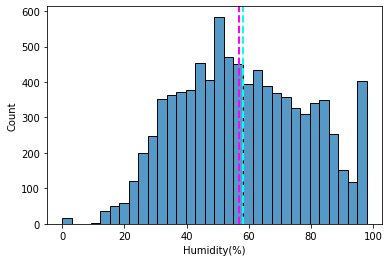

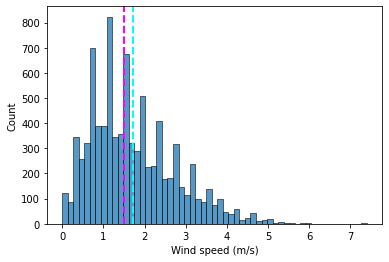

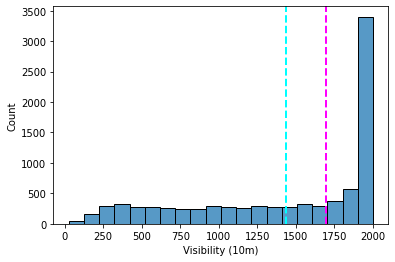

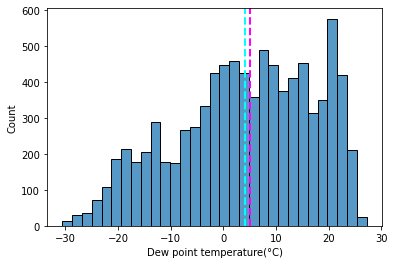

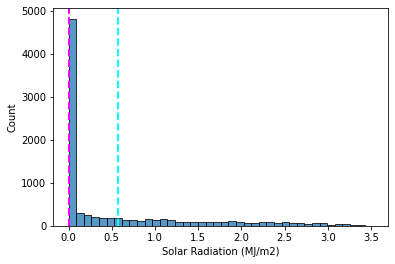

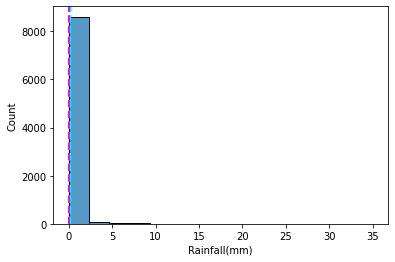

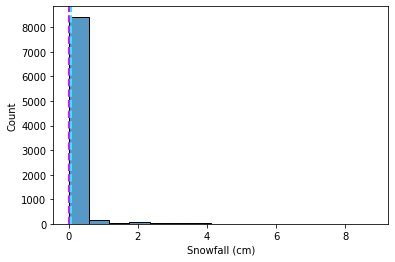

In [18]:
#plotting histogram on numerical columns
for col in num_cols.columns:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(),color='cyan',linewidth=2,linestyle='dashed')
  plt.axvline(df[col].median(),color='magenta',linewidth=2,linestyle='dashed')
  plt.show()

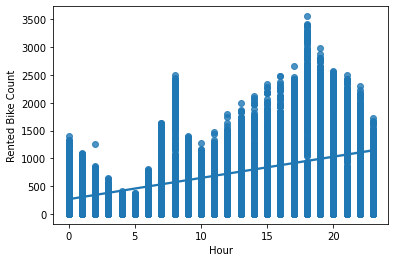

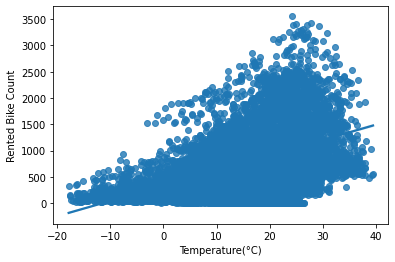

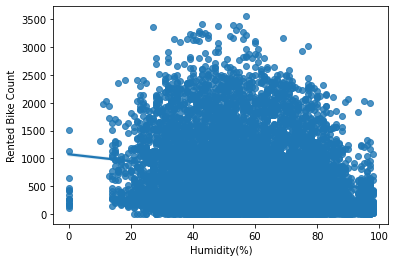

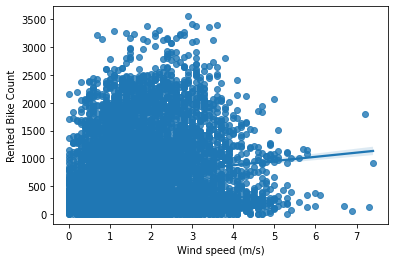

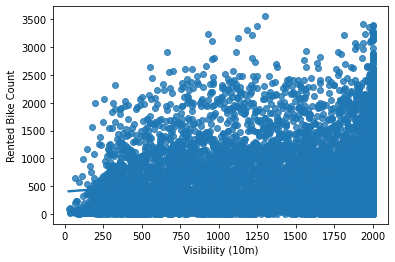

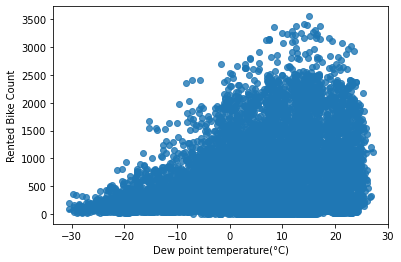

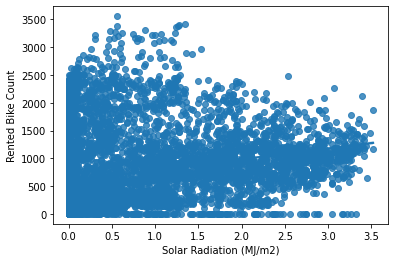

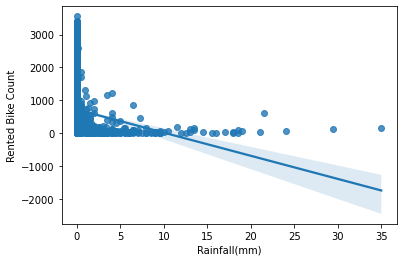

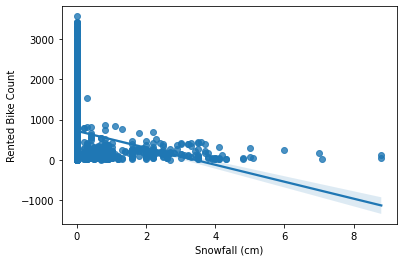

In [19]:
#plotting regression plot of each columns of a dataset v/s rented bike count columns

for col in num_cols:
  if col=='Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df['Rented Bike Count'])
    plt.show()

In [20]:
#extracting date and month
frame=pd.to_datetime(df['Date'],dayfirst=True)

In [21]:
df['Month']=frame.dt.month

In [22]:
df['year']=frame.dt.year

In [23]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018


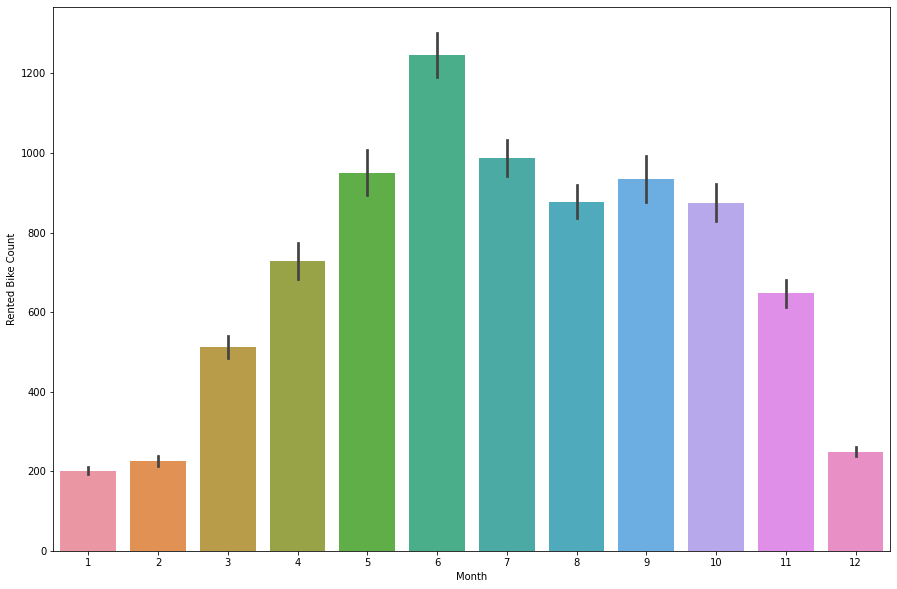

In [24]:
#number of rented bikes at different months
plt.figure(figsize=(15,10))
sns.barplot(x='Month',y='Rented Bike Count',data=df)

NUMBER OF BIKES ACROSS DIFFERENT SEASONS

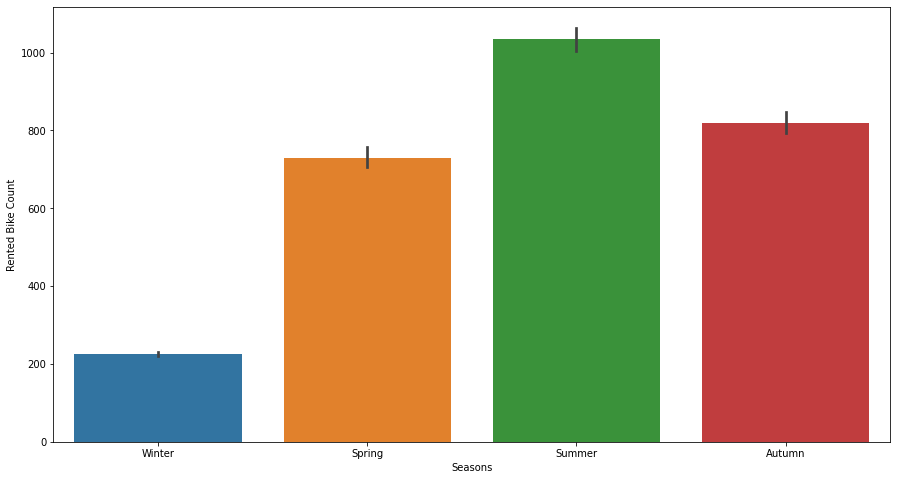

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x='Seasons',y='Rented Bike Count',data=df)

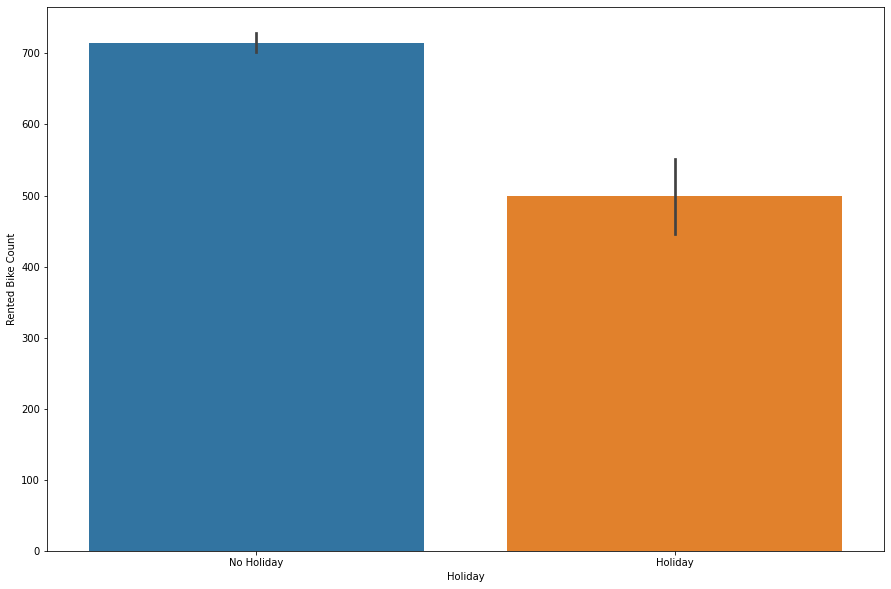

In [26]:
#bike counts on holiday and not on holiday
plt.figure(figsize=(15,10))
sns.barplot(x='Holiday',y='Rented Bike Count',data=df)

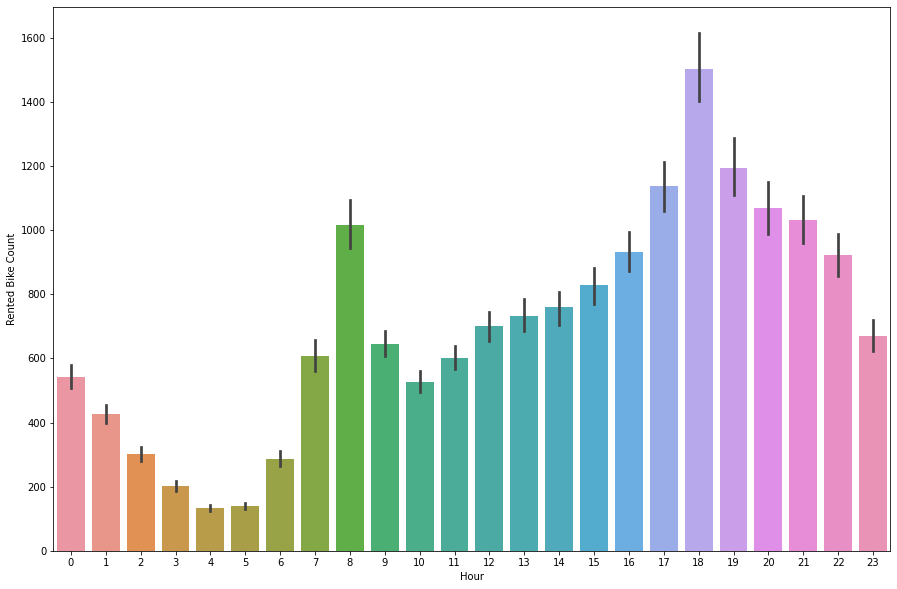

In [27]:
#bike counts across different hours in a day
plt.figure(figsize=(15,10))
sns.barplot(x='Hour',y='Rented Bike Count',data=df)

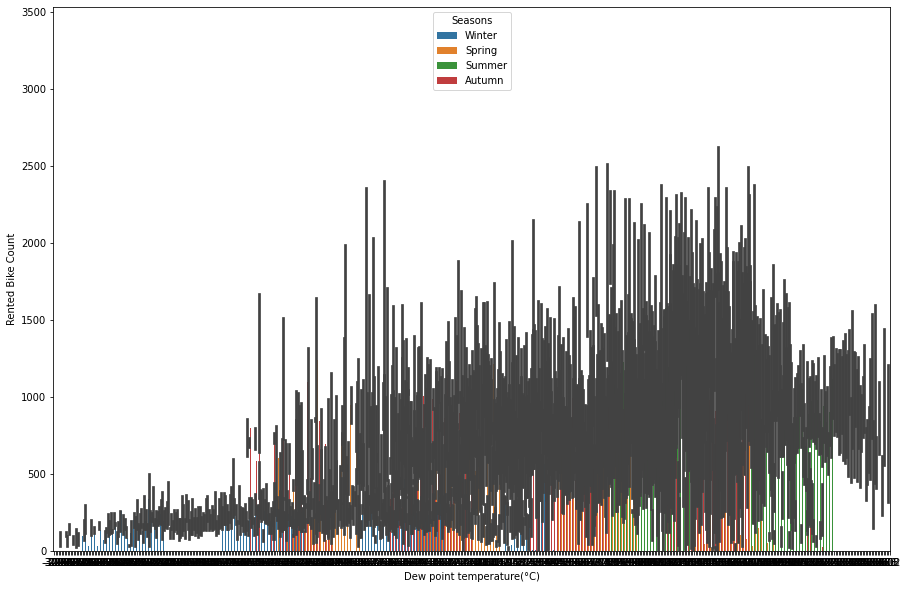

In [28]:
#Dew point temperature impact on bike renting
plt.figure(figsize=(15,10))
sns.barplot(x='Dew point temperature(°C)',y='Rented Bike Count',data=df,hue='Seasons')

#CHECKING OUTLIERS


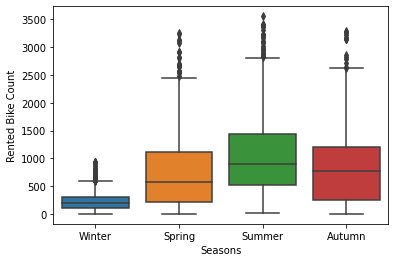

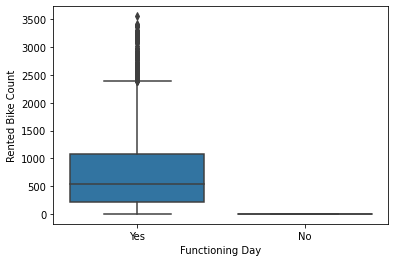

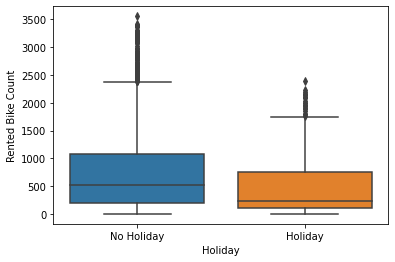

In [29]:
#RELATION of dependent variable with categorical feature
for i in ['Seasons','Functioning Day','Holiday']:
  sns.boxplot(x=df[i],y=df['Rented Bike Count'])
  plt.show()

MODELLING

In [30]:
#importing libraries
import pandas as  pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error


In [31]:
cat_cols

,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes
...,...,...,...,...
8755,30/11/2018,Autumn,No Holiday,Yes
8756,30/11/2018,Autumn,No Holiday,Yes
8757,30/11/2018,Autumn,No Holiday,Yes
8758,30/11/2018,Autumn,No Holiday,Yes


In [32]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [33]:
df['Holiday']=df['Holiday'].map({'Holiday':1,'No Holiday':0})

In [34]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Yes,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Yes,12,2017


In [35]:
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [36]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})

In [38]:
dummies=pd.get_dummies(df['Seasons'],drop_first=True)

In [39]:
df=pd.concat([df,dummies],axis=1)

In [40]:
dummies

,Spring,Summer,Winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8755,0,0,0
8756,0,0,0
8757,0,0,0
8758,0,0,0


In [41]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,year,Spring,Summer,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,2017,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,2017,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,12,2017,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,2017,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,12,2017,0,0,1


In [42]:
df1.drop('Seasons',axis=1,inplace=True)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler=MinMaxScaler()

In [45]:
df2=df1

In [46]:
df1.drop('Date',axis=1,inplace=True)

In [47]:
df1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,11,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,11,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,11,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,11,2018


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Functioning Day            8760 non-null   int64  
 12  Month                      8760 non-null   int64  
 13  year                       8760 non-null   int64

In [49]:
num_cols.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [50]:
cols=['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [51]:
df1[cols]=scaler.fit_transform(df1[cols])

In [52]:
x=df1.iloc[:,1:]

In [53]:
x

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,year
0,0.000000,0.220280,0.377551,0.297297,1.000000,0.224913,0.0,0.0,0.0,0,1,12,2017
1,0.043478,0.215035,0.387755,0.108108,1.000000,0.224913,0.0,0.0,0.0,0,1,12,2017
2,0.086957,0.206294,0.397959,0.135135,1.000000,0.223183,0.0,0.0,0.0,0,1,12,2017
3,0.130435,0.202797,0.408163,0.121622,1.000000,0.224913,0.0,0.0,0.0,0,1,12,2017
4,0.173913,0.206294,0.367347,0.310811,1.000000,0.207612,0.0,0.0,0.0,0,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.826087,0.384615,0.346939,0.351351,0.946275,0.351211,0.0,0.0,0.0,0,1,11,2018
8756,0.869565,0.370629,0.377551,0.310811,1.000000,0.358131,0.0,0.0,0.0,0,1,11,2018
8757,0.913043,0.356643,0.397959,0.040541,0.983781,0.358131,0.0,0.0,0.0,0,1,11,2018
8758,0.956522,0.347902,0.418367,0.135135,0.928535,0.359862,0.0,0.0,0.0,0,1,11,2018


In [54]:
y=df1[['Rented Bike Count']]

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [56]:
import statsmodels.api as sm

In [57]:
x_train_lm=sm.add_constant(x_train)
x_train_lm

,const,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,year
1444,1.0,0.173913,0.117133,0.510204,0.162162,0.992904,0.193772,0.000000,0.000000,0.0,0,1,1,2018
1652,1.0,0.869565,0.209790,0.448980,0.283784,0.996959,0.250865,0.000000,0.000000,0.0,0,1,2,2018
7496,1.0,0.347826,0.510490,0.673469,0.108108,0.995438,0.619377,0.051136,0.000000,0.0,1,0,10,2018
1893,1.0,0.913043,0.270979,0.387755,0.310811,1.000000,0.275087,0.000000,0.000000,0.0,1,1,2,2018
3880,1.0,0.695652,0.645105,0.551020,0.432432,0.261024,0.693772,0.267045,0.000000,0.0,0,1,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.0,0.956522,0.833916,0.755102,0.270270,0.595033,0.956747,0.000000,0.000000,0.0,0,1,7,2018
5191,1.0,0.304348,0.722028,0.918367,0.067568,0.211860,0.904844,0.014205,0.014286,0.0,0,1,7,2018
5390,1.0,0.608696,0.826923,0.632653,0.364865,0.970096,0.899654,0.508523,0.000000,0.0,0,1,7,2018
860,1.0,0.869565,0.251748,0.520408,0.148649,0.691333,0.320069,0.000000,0.000000,0.0,0,1,1,2018


In [58]:
r = sm.OLS(y_train, x_train_lm).fit()

In [59]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     561.6
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        10:39:14   Log-Likelihood:                 4156.5
No. Observations:                6132   AIC:                            -8285.
Df Residuals:                    6118   BIC:                            -8191.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -179.7611     16.549    -10.862      0.000    -212.203    -147.319
Hour                          0.1857      0.006     32.480      0.000       0.174       0.197
Temperature(°C)               0.3180      0.071      4.497      0.000       0.179       0.457
Humidity(%)                  -0.2660      0.034     -7.778      0.000      -0.333      -0.199
Wind speed (m/s)              0.0383      0.013      2.989      0.003       0.013       0.063
Visibility (10m)             -0.0013      0.007     -0.204      0.838      -0.014       0.011
Dew point temperature(°C)     0.1283      0.075      1.710      0.087      -0.019       0.276
Solar Radiation (MJ/m2)      -0.0704      0.009     -7.835      0.000      -0.088      -0.053
Rainfall(mm)                 -0.6861      0.056    -12.187      0.000      -0.796      -0.576
Snowfall (cm)                 0.0151      0.033      0.463      0.644      -0.049       0.079
Holiday                      -0.0371      0.007     -5.076      0.000      -0.051      -0.023
Functioning Day               0.2583      0.009     29.183      0.000       0.241       0.276
Month                         0.0087      0.001     13.683      0.000       0.007       0.010
year                          0.0889      0.008     10.846      0.000       0.073       0.105
==============================================================================
Omnibus:                      916.915   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1757.003
Skew:                           0.934   Prob(JB):                         0.00
Kurtosis:                       4.840   Cond. No.                     2.13e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
vif=pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

In [62]:
vif

,features,VIF
5,Dew point temperature(°C),942.31
1,Temperature(°C),672.10
2,Humidity(%),187.92
12,year,133.23
10,Functioning Day,29.90
4,Visibility (10m),10.30
11,Month,5.28
3,Wind speed (m/s),4.91
0,Hour,4.50
6,Solar Radiation (MJ/m2),2.93


In [63]:
x_trax_train_lm.drop(['Visibility (10m)','Dew point temperature(°C)'],axis=1,inplace=True)

In [64]:
x_train_lm

,const,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,year
1444,1.0,0.173913,0.117133,0.510204,0.162162,0.000000,0.000000,0.0,0,1,1,2018
1652,1.0,0.869565,0.209790,0.448980,0.283784,0.000000,0.000000,0.0,0,1,2,2018
7496,1.0,0.347826,0.510490,0.673469,0.108108,0.051136,0.000000,0.0,1,0,10,2018
1893,1.0,0.913043,0.270979,0.387755,0.310811,0.000000,0.000000,0.0,1,1,2,2018
3880,1.0,0.695652,0.645105,0.551020,0.432432,0.267045,0.000000,0.0,0,1,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.0,0.956522,0.833916,0.755102,0.270270,0.000000,0.000000,0.0,0,1,7,2018
5191,1.0,0.304348,0.722028,0.918367,0.067568,0.014205,0.014286,0.0,0,1,7,2018
5390,1.0,0.608696,0.826923,0.632653,0.364865,0.508523,0.000000,0.0,0,1,7,2018
860,1.0,0.869565,0.251748,0.520408,0.148649,0.000000,0.000000,0.0,0,1,1,2018


In [65]:
lr=sm.OLS(y_train,x_train_lm).fit()

In [66]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     663.4
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        10:39:14   Log-Likelihood:                 4155.0
No. Observations:                6132   AIC:                            -8286.
Df Residuals:                    6120   BIC:                            -8205.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -179.6426     16.385    -10.964      0.000    -211.764    -147.522
Hour                        0.1853      0.006     32.547      0.000       0.174       0.196
Temperature(°C)             0.4372      0.011     39.854      0.000       0.416       0.459
Humidity(%)                -0.2109      0.010    -21.047      0.000      -0.231      -0.191
Wind speed (m/s)            0.0373      0.013      2.930      0.003       0.012       0.062
Solar Radiation (MJ/m2)    -0.0736      0.008     -8.667      0.000      -0.090      -0.057
Rainfall(mm)               -0.6972      0.056    -12.487      0.000      -0.807      -0.588
Snowfall (cm)               0.0116      0.033      0.356      0.722      -0.052       0.076
Holiday                    -0.0372      0.007     -5.083      0.000      -0.051      -0.023
Functioning Day             0.2581      0.009     29.159      0.000       0.241       0.275
Month                       0.0087      0.001     13.955      0.000       0.007       0.010
year                        0.0889      0.008     10.946      0.000       0.073       0.105
==============================================================================
Omnibus:                      921.734   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1767.965
Skew:                           0.938   Prob(JB):                         0.00
Kurtosis:                       4.844   Cond. No.                     2.10e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
vif2=pd.DataFrame()
vif2['features']=x_train.columns
vif2['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif2['VIF']=round(vif2['VIF'],2)
vif2=vif2.sort_values(by='VIF',ascending=False)

In [68]:
vif2

,features,VIF
5,Dew point temperature(°C),942.31
1,Temperature(°C),672.10
2,Humidity(%),187.92
12,year,133.23
10,Functioning Day,29.90
4,Visibility (10m),10.30
11,Month,5.28
3,Wind speed (m/s),4.91
0,Hour,4.50
6,Solar Radiation (MJ/m2),2.93


In [69]:
x_train.shape

(6132, 13)

In [70]:
x_train.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Month', 'year'],
      dtype='object')

In [71]:
x_train.drop(['Dew point temperature(°C)', 'Month', 'year'],axis=1,inplace=True)

In [72]:
vif3=pd.DataFrame()
vif3['features']=x_train.columns
vif3['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif3['VIF']=round(vif3['VIF'],2)
vif3=vif3.sort_values(by='VIF',ascending=False)

In [73]:
vif3

,features,VIF
9,Functioning Day,17.75
2,Humidity(%),13.70
1,Temperature(°C),12.42
4,Visibility (10m),6.83
3,Wind speed (m/s),4.64
0,Hour,4.25
5,Solar Radiation (MJ/m2),2.61
7,Snowfall (cm),1.12
6,Rainfall(mm),1.09
8,Holiday,1.05


In [78]:
lr=sm.OLS(y_train,sm.add_constant(x_train)).fit()

In [79]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     688.5
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        10:45:57   Log-Likelihood:                 4059.0
No. Observations:                6132   AIC:                            -8096.
Df Residuals:                    6121   BIC:                            -8022.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2765      0.014    -19.196      0.000      -0.305      -0.248
Hour                        0.1846      0.006     31.864      0.000       0.173       0.196
Temperature(°C)             0.5091      0.010     52.279      0.000       0.490       0.528
Humidity(%)                -0.1927      0.012    -15.765      0.000      -0.217      -0.169
Wind speed (m/s)            0.0121      0.013      0.942      0.346      -0.013       0.037
Visibility (10m)            0.0178      0.006      2.752      0.006       0.005       0.031
Solar Radiation (MJ/m2)    -0.0767      0.009     -8.625      0.000      -0.094      -0.059
Rainfall(mm)               -0.6881      0.057    -12.121      0.000      -0.799      -0.577
Snowfall (cm)               0.0196      0.033      0.595      0.552      -0.045       0.084
Holiday                    -0.0401      0.007     -5.439      0.000      -0.055      -0.026
Functioning Day             0.2327      0.009     26.449      0.000       0.215       0.250
==============================================================================
Omnibus:                      865.746   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1612.233
Skew:                           0.900   Prob(JB):                         0.00
Kurtosis:                       4.752   Cond. No.                         66.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
x2=x_train

In [83]:
x2.drop(['Humidity(%)'],axis=1,inplace=True)

In [84]:
x2

,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day
1444,0.173913,0.117133,0.162162,0.992904,0.000000,0.000000,0.0,0,1
1652,0.869565,0.209790,0.283784,0.996959,0.000000,0.000000,0.0,0,1
7496,0.347826,0.510490,0.108108,0.995438,0.051136,0.000000,0.0,1,0
1893,0.913043,0.270979,0.310811,1.000000,0.000000,0.000000,0.0,1,1
3880,0.695652,0.645105,0.432432,0.261024,0.267045,0.000000,0.0,0,1
...,...,...,...,...,...,...,...,...,...
5734,0.956522,0.833916,0.270270,0.595033,0.000000,0.000000,0.0,0,1
5191,0.304348,0.722028,0.067568,0.211860,0.014205,0.014286,0.0,0,1
5390,0.608696,0.826923,0.364865,0.970096,0.508523,0.000000,0.0,0,1
860,0.869565,0.251748,0.148649,0.691333,0.000000,0.000000,0.0,0,1


In [86]:
vif4=pd.DataFrame()
vif4['features']=x2.columns
vif4['VIF']=[variance_inflation_factor(x2.values,i) for i in range(x2.shape[1])]
vif4['VIF']=round(vif4['VIF'],2)
vif4=vif4.sort_values(by='VIF',ascending=False)

In [87]:
vif4

,features,VIF
8,Functioning Day,10.82
1,Temperature(°C),7.83
3,Visibility (10m),6.20
2,Wind speed (m/s),4.60
0,Hour,4.19
4,Solar Radiation (MJ/m2),1.87
6,Snowfall (cm),1.08
5,Rainfall(mm),1.07
7,Holiday,1.05


In [89]:
lr3=sm.OLS(y_train,sm.add_constant(x2)).fit()

In [90]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     708.7
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        10:55:15   Log-Likelihood:                 3936.9
No. Observations:                6132   AIC:                            -7854.
Df Residuals:                    6122   BIC:                            -7787.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.4221      0.011    -37.441      0.000      -0.444      -0.400
Hour                        0.2062      0.006     35.905      0.000       0.195       0.217
Temperature(°C)             0.4375      0.009     49.793      0.000       0.420       0.455
Wind speed (m/s)            0.0229      0.013      1.753      0.080      -0.003       0.049
Visibility (10m)            0.0745      0.005     13.549      0.000       0.064       0.085
Solar Radiation (MJ/m2)     0.0013      0.008      0.170      0.865      -0.014       0.016
Rainfall(mm)               -0.8375      0.057    -14.668      0.000      -0.949      -0.726
Snowfall (cm)              -0.0586      0.033     -1.764      0.078      -0.124       0.007
Holiday                    -0.0378      0.008     -5.032      0.000      -0.053      -0.023
Functioning Day             0.2370      0.009     26.414      0.000       0.219       0.255
==============================================================================
Omnibus:                      818.340   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1497.360
Skew:                           0.864   Prob(JB):                         0.00
Kurtosis:                       4.695   Cond. No.                         62.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 1 - LINEAR REGRESSION

In [94]:
X=df2[x2.columns]

In [95]:
y

,Rented Bike Count
0,0.071429
1,0.057368
2,0.048650
3,0.030090
4,0.021935
...,...
8755,0.282058
8756,0.214848
8757,0.195163
8758,0.200225


In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
LR=LinearRegression()

In [99]:
LR.fit(X_train,y_train)

LinearRegression()

In [101]:
y_predict=LR.predict(X_train)

In [102]:
def score_metrics(actual,predicted):
  mse = mean_squared_error(actual,predicted)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual,predicted))

In [104]:
score_metrics(actual=y_train,predicted=y_predict)


mean squared error is  : 0.016161160959480097
Root mean squared error is  : 0.12712655489503402
R2 score is  : 0.5085207377380541


In [105]:
y_test_pred=LR.predict(X_test)

In [106]:
score_metrics(y_test,y_test_pred)

mean squared error is  : 0.016947668462395996
Root mean squared error is  : 0.1301832111387486
R2 score is  : 0.48564140703971537


In [117]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 2)
X_poly = poly_regressor.fit_transform(X_train)
X_poly_test = poly_regressor.fit_transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [119]:
#Predicting training and testing dataset
y_pred2=lin_reg.predict(X_poly)

In [120]:
y_pred3=lin_reg.predict(X_poly_test)

In [121]:
score_metrics(y_train,y_pred2)

mean squared error is  : 0.012359218068004194
Root mean squared error is  : 0.11117202016696555
R2 score is  : 0.6241421396998064


In [122]:
score_metrics(y_test,y_pred3)

mean squared error is  : 0.013604870338542937
Root mean squared error is  : 0.11663991743199639
R2 score is  : 0.5870947097963979


In [123]:
r2_score(y_train,y_pred1)

0.5085207377380541

In [124]:
r2_score(y_train,y_pred2)

0.6241421396998064

In [131]:
random=RandomForestClassifier(n_estimators=100,criterion='gini',max_features='sqrt')

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
random1=RandomForestRegressor(n_estimators=100,criterion='mse',max_features='sqrt',random_state=42)

In [137]:
random1.fit(X_train,y_train)

RandomForestRegressor(criterion='mse', max_features='sqrt', random_state=42)

In [140]:
y_pred5=random1.predict(X_test)

In [141]:
score_metrics(y_test,y_pred5)

mean squared error is  : 0.00558337572988335
Root mean squared error is  : 0.07472198960067478
R2 score is  : 0.8305455826703498
